In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df

,appno,application,country.alpha2,country.name,decisiondate,docname,doctypebranch,ecli,introductiondate,issue.0,...,ccl_article=6,ccl_article=7,ccl_article=8,ccl_article=9,ccl_article=p1,ccl_article=p12,ccl_article=p4,ccl_article=p6,ccl_article=p7,importance
0,2052/08,MS WORD,ru,Russian Federation,NaN,CASE OF KOKOSHKINA v. RUSSIA,CHAMBER,ECLI:CE:ECHR:2009:0528JUD000205208,NaN,NaN,...,0,0,0,0,0,0,0,0,0,4
1,4728/07,MS WORD,tr,Turkey,NaN,CASE OF ÖZCAN v. TURKEY,COMMITTEE,ECLI:CE:ECHR:2018:0710JUD000472807,NaN,NaN,...,0,0,0,0,0,0,0,0,0,4
2,44135/06,MS WORD,si,Slovenia,NaN,CASE OF DANIJEL PEČNIK v. SLOVENIA,CHAMBER,ECLI:CE:ECHR:2012:1018JUD004413506,NaN,NaN,...,1,0,0,0,0,0,0,0,0,4
3,2607/08,MS WORD,ch,Switzerland,NaN,CASE OF PALANCI v. SWITZERLAND,CHAMBER,ECLI:CE:ECHR:2014:0325JUD000260708,NaN,NaN,...,0,0,-1,0,0,0,0,0,0,4
4,27001/06,MS WORD,ru,Russian Federation,NaN,CASE OF AMANAT ILYASOVA AND OTHERS v. RUSSIA,CHAMBER,ECLI:CE:ECHR:2009:1001JUD002700106,NaN,NaN,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8873,60085/12,MS WORD,ua,Ukraine,NaN,CASE OF RASHITOV AND OTHERS v. UKRAINE,COMMITTEE,ECLI:CE:ECHR:2018:0329JUD006008512,NaN,NaN,...,1,0,0,0,0,0,0,0,0,4
8874,19857/09,MS WORD,ru,Russian Federation,NaN,CASE OF URMANOV v. RUSSIA,COMMITTEE,ECLI:CE:ECHR:2016:1011JUD001985709,NaN,NaN,...,0,0,0,0,0,0,0,0,0,4
8875,67253/01,MS WORD,ru,Russian Federation,NaN,CASE OF BABUSHKIN v. RUSSIA,CHAMBER,ECLI:CE:ECHR:2007:1018JUD006725301,NaN,NaN,...,0,0,0,0,0,0,0,0,0,4
8876,26737/95,MS WORD,es,Spain,NaN,CASE OF BRUALLA GÓMEZ DE LA TORRE v. SPAIN,CHAMBER,ECLI:CE:ECHR:1997:1219JUD002673795,NaN,"Leases of Urban Property Act, section 135, as ...",...,-1,0,0,0,0,0,0,0,0,3


In [4]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8878 entries, 0 to 8877
Data columns (total 328 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   appno                              8878 non-null   object 
 1   application                        8878 non-null   object 
 2   country.alpha2                     8878 non-null   object 
 3   country.name                       8878 non-null   object 
 4   decisiondate                       676 non-null    object 
 5   docname                            8878 non-null   object 
 6   doctypebranch                      8878 non-null   object 
 7   ecli                               8878 non-null   object 
 8   introductiondate                   676 non-null    object 
 9   issue.0                            2248 non-null   object 
 10  issue.1                            1185 non-null   object 
 11  issue.10                           21 non-null     obje

In [5]:
def missing_values(data, percentage):

    columns = data.columns
    percent_missing = df.isnull().sum() * 100 / len(data)
    missing_value_df = pd.DataFrame({'column_name': columns,
                                 'percent_missing': percent_missing})
    low_missing=list(missing_value_df[(missing_value_df['percent_missing']>0) & (missing_value_df.percent_missing<10)].column_name)
    print(low_missing)
    missing_drop = list(missing_value_df[missing_value_df.percent_missing>percentage].column_name)
    data = data.drop(missing_drop, axis=1)
    return data

In [6]:
df=missing_values(df,50)

['parties.1']


In [7]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8878 entries, 0 to 8877
Data columns (total 294 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   appno                              8878 non-null   object 
 1   application                        8878 non-null   object 
 2   country.alpha2                     8878 non-null   object 
 3   country.name                       8878 non-null   object 
 4   docname                            8878 non-null   object 
 5   doctypebranch                      8878 non-null   object 
 6   ecli                               8878 non-null   object 
 7   itemid                             8878 non-null   object 
 8   judgementdate                      8878 non-null   object 
 9   kpdate                             8878 non-null   object 
 10  languageisocode                    8878 non-null   object 
 11  originatingbody                    8878 non-null   int6

In [8]:
pd.set_option('display.max_columns', None)
df

,appno,application,country.alpha2,country.name,docname,doctypebranch,ecli,itemid,judgementdate,kpdate,languageisocode,originatingbody,originatingbody_name,originatingbody_type,parties.0,parties.1,rank,respondent.0,respondentOrderEng,separateopinion,sharepointid,typedescription,article=3,article=6,article=P1,article=5,article=8,article=13,article=10,article=2,article=34,article=41,article=38,article=35,article=4,article=29,article=14,article=P12,article=9,article=1,article=11,article=46,article=P4,article=17,article=18,article=7,article=,article=37,article=P7,article=57,article=26,article=27,article=36,article=30,article=12,article=56,article=39,article=15,article=25,article=P6,article=19,article=32,article=33,article=53,article=28,article=43,article=52,article=P13,article=16,documentcollectionid=CASELAW,documentcollectionid=JUDGMENTS,documentcollectionid=CHAMBER,documentcollectionid=ENG,documentcollectionid=COMMITTEE,documentcollectionid=GRANDCHAMBER,applicability=,applicability=36,applicability=43,applicability=41,applicability=55,applicability=3,applicability=22,applicability=60,applicability=58,applicability=25,applicability=47,applicability=12,applicability=38,applicability=20,applicability=18,applicability=24,applicability=62,applicability=21,applicability=23,applicability=8,applicability=26,applicability=53,applicability=15,applicability=48,applicability=14,applicability=51,applicability=13,applicability=5,applicability=7,applicability=50,applicability=52,applicability=28,applicability=29,applicability=31,applicability=6,applicability=81,applicability=66,applicability=49,applicability=33,applicability=63,applicability=68,applicability=46,applicability=19,applicability=40,applicability=17,applicability=32,applicability=72,applicability=34,applicability=35,applicability=54,applicability=27,applicability=16,applicability=64,applicability=57,applicability=56,applicability=2,applicability=4,applicability=67,applicability=77,applicability=71,applicability=59,paragraphs=3,paragraphs=6,paragraphs=6-1,paragraphs=6-3-c,paragraphs=P1-3,paragraphs=5,paragraphs=5-1,paragraphs=P1-1,paragraphs=8,paragraphs=8-1,paragraphs=13,paragraphs=10,paragraphs=10-2,paragraphs=10-1,paragraphs=35-1,paragraphs=2,paragraphs=2-1,paragraphs=34,paragraphs=41,paragraphs=38,paragraphs=35,paragraphs=8-2,paragraphs=35-3-a,paragraphs=29-3,paragraphs=4,paragraphs=29,paragraphs=P1-1-1,paragraphs=5-1-e,paragraphs=6-2,paragraphs=5-1-c,paragraphs=14,paragraphs=35-3,paragraphs=6-3-d,paragraphs=5-1-b,paragraphs=5-5,paragraphs=P12-1,paragraphs=11-1,paragraphs=11-2,paragraphs=9,paragraphs=9-1,paragraphs=1,paragraphs=11,paragraphs=6-3,paragraphs=5-3,paragraphs=5-4,paragraphs=46,paragraphs=46-2,paragraphs=5-1-a,paragraphs=P4-2,paragraphs=P4-2-2,paragraphs=17,paragraphs=18,paragraphs=7,paragraphs=7-1,paragraphs=,paragraphs=4-3-d,paragraphs=4-2,paragraphs=6-3-e,paragraphs=9-2,paragraphs=P1-1-2,paragraphs=P4-2-1,paragraphs=37-1-c,paragraphs=37,paragraphs=P7-4,paragraphs=4-1,paragraphs=57,paragraphs=6-3-b,paragraphs=35-3-b,paragraphs=5-1-f,paragraphs=35-4,paragraphs=P4-2-3,paragraphs=2-2,paragraphs=26,paragraphs=27-2,paragraphs=27,paragraphs=36,paragraphs=36-1,paragraphs=37-1,paragraphs=P7-2,paragraphs=35-2,paragraphs=5-1-d,paragraphs=6-3-a,paragraphs=30,paragraphs=46-1,paragraphs=12,paragraphs=P7-1,paragraphs=P7-1-1,paragraphs=36-2,paragraphs=5-2,paragraphs=P1-2,paragraphs=P1-4,paragraphs=56-3,paragraphs=56,paragraphs=56-1,paragraphs=P7-1-2,paragraphs=38-1-a,paragraphs=37-1-b,paragraphs=39,paragraphs=15-1,paragraphs=15,paragraphs=7-2,paragraphs=P4-4,paragraphs=15-3,paragraphs=25-1,paragraphs=25,paragraphs=37-1-a,paragraphs=P6-1,paragraphs=P7-5,paragraphs=19,paragraphs=32,paragraphs=P7-3,paragraphs=33,paragraphs=28-1-a,paragraphs=53,paragraphs=28,paragraphs=35-2-b,paragraphs=43,paragraphs=4-3-b,paragraphs=4-3-a,paragraphs=4-3,paragraphs=28-3,paragraphs=52,paragraphs=P13-1,paragraphs=P7-4-1,paragraphs=16,paragraphs=P4-3,paragraphs=27-1-b,paragraphs=29-1,paragraphs=32-2,parag

In [9]:
df=df.dropna()

In [10]:
df['importance'].value_counts()

4    5772
3    2011
1     582
2     509
Name: importance, dtype: int64

In [11]:
## Checking the Categorical features importance
cat_df = df.select_dtypes(include=['object']).copy()

In [12]:
cat_df

,appno,application,country.alpha2,country.name,docname,doctypebranch,ecli,itemid,judgementdate,kpdate,languageisocode,originatingbody_name,originatingbody_type,parties.0,parties.1,respondent.0
0,2052/08,MS WORD,ru,Russian Federation,CASE OF KOKOSHKINA v. RUSSIA,CHAMBER,ECLI:CE:ECHR:2009:0528JUD000205208,001-92699,28/05/2009,28/05/2009,ENG,First Section,Court,KOKOSHKINA,RUSSIA,RUS
1,4728/07,MS WORD,tr,Turkey,CASE OF ÖZCAN v. TURKEY,COMMITTEE,ECLI:CE:ECHR:2018:0710JUD000472807,001-184490,10/07/2018,10/07/2018,ENG,Second Section Committee,Court,ÖZCAN,TURKEY,TUR
2,44135/06,MS WORD,si,Slovenia,CASE OF DANIJEL PEČNIK v. SLOVENIA,CHAMBER,ECLI:CE:ECHR:2012:1018JUD004413506,001-113810,18/10/2012,18/10/2012,ENG,Fith Section,Court,DANIJEL PEČNIK,SLOVENIA,SVN
3,2607/08,MS WORD,ch,Switzerland,CASE OF PALANCI v. SWITZERLAND,CHAMBER,ECLI:CE:ECHR:2014:0325JUD000260708,001-141929,25/03/2014,25/03/2014,ENG,Second Section,Court,PALANCI,SWITZERLAND,CHE
4,27001/06,MS WORD,ru,Russian Federation,CASE OF AMANAT ILYASOVA AND OTHERS v. RUSSIA,CHAMBER,ECLI:CE:ECHR:2009:1001JUD002700106,001-94585,01/10/2009,01/10/2009,ENG,First Section,Court,AMANAT ILYASOVA AND OTHERS,RUSSIA,RUS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8873,60085/12,MS WORD,ua,Ukraine,CASE OF RASHITOV AND OTHERS v. UKRAINE,COMMITTEE,ECLI:CE:ECHR:2018:0329JUD006008512,001-181843,29/03/2018,29/03/2018,ENG,Fith Section Committee,Court,RASHITOV AND OTHERS,UKRAINE,UKR
8874,19857/09,MS WORD,ru,Russian Federation,CASE OF URMANOV v. RUSSIA,COMMITTEE,ECLI:CE:ECHR:2016:1011JUD001985709,001-167104,11/10/2016,11/10/2016,ENG,Third Section Committee,Court,URMANOV,RUSSIA,RUS
8875,67253/01,MS WORD,ru,Russian Federation,CASE OF BABUSHKIN v. RUSSIA,CHAMBER,ECLI:CE:ECHR:2007:1018JUD006725301,001-82818,18/10/2007,18/10/2007,ENG,Third Section,Court,BABUSHKIN,RUSSIA,RUS
8876,26737/95,MS WORD,es,Spain,CASE OF BRUALLA GÓMEZ DE LA TORRE v. SPAIN,CHAMBER,ECLI:CE:ECHR:1997:1219JUD002673795,001-58127,19/12/1997,19/12/1997,ENG,Chamber,Court,BRUALLA GÓMEZ DE LA TORRE,SPAIN,ESP


In [13]:
x=cat_df
y=df['importance']

In [14]:
x

,appno,application,country.alpha2,country.name,docname,doctypebranch,ecli,itemid,judgementdate,kpdate,languageisocode,originatingbody_name,originatingbody_type,parties.0,parties.1,respondent.0
0,2052/08,MS WORD,ru,Russian Federation,CASE OF KOKOSHKINA v. RUSSIA,CHAMBER,ECLI:CE:ECHR:2009:0528JUD000205208,001-92699,28/05/2009,28/05/2009,ENG,First Section,Court,KOKOSHKINA,RUSSIA,RUS
1,4728/07,MS WORD,tr,Turkey,CASE OF ÖZCAN v. TURKEY,COMMITTEE,ECLI:CE:ECHR:2018:0710JUD000472807,001-184490,10/07/2018,10/07/2018,ENG,Second Section Committee,Court,ÖZCAN,TURKEY,TUR
2,44135/06,MS WORD,si,Slovenia,CASE OF DANIJEL PEČNIK v. SLOVENIA,CHAMBER,ECLI:CE:ECHR:2012:1018JUD004413506,001-113810,18/10/2012,18/10/2012,ENG,Fith Section,Court,DANIJEL PEČNIK,SLOVENIA,SVN
3,2607/08,MS WORD,ch,Switzerland,CASE OF PALANCI v. SWITZERLAND,CHAMBER,ECLI:CE:ECHR:2014:0325JUD000260708,001-141929,25/03/2014,25/03/2014,ENG,Second Section,Court,PALANCI,SWITZERLAND,CHE
4,27001/06,MS WORD,ru,Russian Federation,CASE OF AMANAT ILYASOVA AND OTHERS v. RUSSIA,CHAMBER,ECLI:CE:ECHR:2009:1001JUD002700106,001-94585,01/10/2009,01/10/2009,ENG,First Section,Court,AMANAT ILYASOVA AND OTHERS,RUSSIA,RUS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8873,60085/12,MS WORD,ua,Ukraine,CASE OF RASHITOV AND OTHERS v. UKRAINE,COMMITTEE,ECLI:CE:ECHR:2018:0329JUD006008512,001-181843,29/03/2018,29/03/2018,ENG,Fith Section Committee,Court,RASHITOV AND OTHERS,UKRAINE,UKR
8874,19857/09,MS WORD,ru,Russian Federation,CASE OF URMANOV v. RUSSIA,COMMITTEE,ECLI:CE:ECHR:2016:1011JUD001985709,001-167104,11/10/2016,11/10/2016,ENG,Third Section Committee,Court,URMANOV,RUSSIA,RUS
8875,67253/01,MS WORD,ru,Russian Federation,CASE OF BABUSHKIN v. RUSSIA,CHAMBER,ECLI:CE:ECHR:2007:1018JUD006725301,001-82818,18/10/2007,18/10/2007,ENG,Third Section,Court,BABUSHKIN,RUSSIA,RUS
8876,26737/95,MS WORD,es,Spain,CASE OF BRUALLA GÓMEZ DE LA TORRE v. SPAIN,CHAMBER,ECLI:CE:ECHR:1997:1219JUD002673795,001-58127,19/12/1997,19/12/1997,ENG,Chamber,Court,BRUALLA GÓMEZ DE LA TORRE,SPAIN,ESP


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from matplotlib import pyplot

In [16]:
catx_train, catx_test, caty_train, caty_test=train_test_split(x,y,test_size=0.33,random_state=1)

Feature 0: 0.025782:
Feature 1: 0.017205:
Feature 2: 0.108148:
Feature 3: 0.106765:
Feature 4: 0.038207:
Feature 5: 0.171993:
Feature 6: 0.164758:
Feature 7: 0.168320:
Feature 8: 0.084835:
Feature 9: 0.084225:
Feature 10: 0.001665:
Feature 11: 0.222028:
Feature 12: 0.000000:
Feature 13: 0.041868:
Feature 14: 0.114838:
Feature 15: 0.123608:


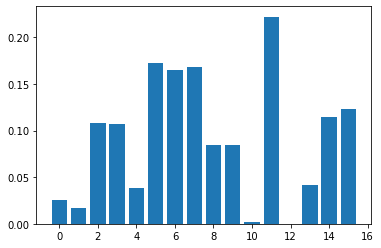

In [17]:
def select_features(x1_train,y1_train,x1_test):
    fs = SelectKBest(score_func=mutual_info_classif, k='all')
    fs.fit(x1_train,y1_train)
    x1_train_fs=fs.transform(x1_train)
    x1_test_fs=fs.transform(x1_test)
    return x1_train_fs,x1_test_fs,fs

def prepare_inputs(x2_train,x2_test):
    oe = OrdinalEncoder()
    oe.fit(x2_train)
    x2_train_enc= oe.transform(x2_train)
    x2_test_enc= oe.fit_transform(x2_test)
    return x2_train_enc,x2_test_enc

x2_train_enc, x2_test_enc= prepare_inputs(catx_train,catx_test)
x1_train_fs, x1_test_fs, fs = select_features(x2_train_enc,caty_train,x2_test_enc)
for i in range(len(fs.scores_)):
    print('Feature %d: %f:'%(i,fs.scores_[i]))
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

## using Chisqure test

Feature 0: 0.023924:
Feature 1: 0.000000:
Feature 2: 0.111454:
Feature 3: 0.112224:
Feature 4: 0.036791:
Feature 5: 0.165627:
Feature 6: 0.164225:
Feature 7: 0.169197:
Feature 8: 0.087226:
Feature 9: 0.084436:
Feature 10: 0.009662:
Feature 11: 0.217782:
Feature 12: 0.009208:
Feature 13: 0.041927:
Feature 14: 0.122807:
Feature 15: 0.112212:


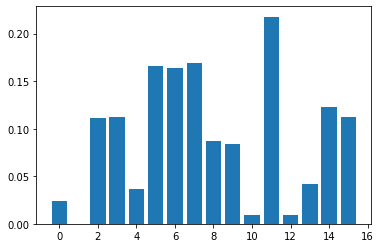

In [18]:
from sklearn.feature_selection import chi2
def select_features(x1_train,y1_train,x1_test):
    fs = SelectKBest(score_func=mutual_info_classif, k='all')
    fs.fit(x1_train,y1_train)
    x1_train_fs=fs.transform(x1_train)
    x1_test_fs=fs.transform(x1_test)
    
    return x1_train_fs,x1_test_fs,fs


x2_train_enc, x2_test_enc= prepare_inputs(catx_train,catx_test)
x1_train_fs, x1_test_fs, fs = select_features(x2_train_enc,caty_train,x2_test_enc)
for i in range(len(fs.scores_)):
    print('Feature %d: %f:'%(i,fs.scores_[i]))
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [19]:
## From the above we can see the categorical Feature Importance and we can drop those based on that
df.drop(['appno','application','country.alpha2','docname','languageisocode','country.name','parties.1','judgementdate','kpdate','originatingbody_type','parties.0'],axis=1,inplace=True)

In [20]:
df

,doctypebranch,ecli,itemid,originatingbody,originatingbody_name,rank,respondent.0,respondentOrderEng,separateopinion,sharepointid,typedescription,article=3,article=6,article=P1,article=5,article=8,article=13,article=10,article=2,article=34,article=41,article=38,article=35,article=4,article=29,article=14,article=P12,article=9,article=1,article=11,article=46,article=P4,article=17,article=18,article=7,article=,article=37,article=P7,article=57,article=26,article=27,article=36,article=30,article=12,article=56,article=39,article=15,article=25,article=P6,article=19,article=32,article=33,article=53,article=28,article=43,article=52,article=P13,article=16,documentcollectionid=CASELAW,documentcollectionid=JUDGMENTS,documentcollectionid=CHAMBER,documentcollectionid=ENG,documentcollectionid=COMMITTEE,documentcollectionid=GRANDCHAMBER,applicability=,applicability=36,applicability=43,applicability=41,applicability=55,applicability=3,applicability=22,applicability=60,applicability=58,applicability=25,applicability=47,applicability=12,applicability=38,applicability=20,applicability=18,applicability=24,applicability=62,applicability=21,applicability=23,applicability=8,applicability=26,applicability=53,applicability=15,applicability=48,applicability=14,applicability=51,applicability=13,applicability=5,applicability=7,applicability=50,applicability=52,applicability=28,applicability=29,applicability=31,applicability=6,applicability=81,applicability=66,applicability=49,applicability=33,applicability=63,applicability=68,applicability=46,applicability=19,applicability=40,applicability=17,applicability=32,applicability=72,applicability=34,applicability=35,applicability=54,applicability=27,applicability=16,applicability=64,applicability=57,applicability=56,applicability=2,applicability=4,applicability=67,applicability=77,applicability=71,applicability=59,paragraphs=3,paragraphs=6,paragraphs=6-1,paragraphs=6-3-c,paragraphs=P1-3,paragraphs=5,paragraphs=5-1,paragraphs=P1-1,paragraphs=8,paragraphs=8-1,paragraphs=13,paragraphs=10,paragraphs=10-2,paragraphs=10-1,paragraphs=35-1,paragraphs=2,paragraphs=2-1,paragraphs=34,paragraphs=41,paragraphs=38,paragraphs=35,paragraphs=8-2,paragraphs=35-3-a,paragraphs=29-3,paragraphs=4,paragraphs=29,paragraphs=P1-1-1,paragraphs=5-1-e,paragraphs=6-2,paragraphs=5-1-c,paragraphs=14,paragraphs=35-3,paragraphs=6-3-d,paragraphs=5-1-b,paragraphs=5-5,paragraphs=P12-1,paragraphs=11-1,paragraphs=11-2,paragraphs=9,paragraphs=9-1,paragraphs=1,paragraphs=11,paragraphs=6-3,paragraphs=5-3,paragraphs=5-4,paragraphs=46,paragraphs=46-2,paragraphs=5-1-a,paragraphs=P4-2,paragraphs=P4-2-2,paragraphs=17,paragraphs=18,paragraphs=7,paragraphs=7-1,paragraphs=,paragraphs=4-3-d,paragraphs=4-2,paragraphs=6-3-e,paragraphs=9-2,paragraphs=P1-1-2,paragraphs=P4-2-1,paragraphs=37-1-c,paragraphs=37,paragraphs=P7-4,paragraphs=4-1,paragraphs=57,paragraphs=6-3-b,paragraphs=35-3-b,paragraphs=5-1-f,paragraphs=35-4,paragraphs=P4-2-3,paragraphs=2-2,paragraphs=26,paragraphs=27-2,paragraphs=27,paragraphs=36,paragraphs=36-1,paragraphs=37-1,paragraphs=P7-2,paragraphs=35-2,paragraphs=5-1-d,paragraphs=6-3-a,paragraphs=30,paragraphs=46-1,paragraphs=12,paragraphs=P7-1,paragraphs=P7-1-1,paragraphs=36-2,paragraphs=5-2,paragraphs=P1-2,paragraphs=P1-4,paragraphs=56-3,paragraphs=56,paragraphs=56-1,paragraphs=P7-1-2,paragraphs=38-1-a,paragraphs=37-1-b,paragraphs=39,paragraphs=15-1,paragraphs=15,paragraphs=7-2,paragraphs=P4-4,paragraphs=15-3,paragraphs=25-1,paragraphs=25,paragraphs=37-1-a,paragraphs=P6-1,paragraphs=P7-5,paragraphs=19,paragraphs=32,paragraphs=P7-3,paragraphs=33,paragraphs=28-1-a,paragraphs=53,paragraphs=28,paragraphs=35-2-b,paragraphs=43,paragraphs=4-3-b,paragraphs=4-3-a,paragraphs=4-3,paragraphs=28-3,paragraphs=52,paragraphs=P13-1,paragraphs=P7-4-1,paragraphs=16,paragraphs=P4-3,paragraphs=27-1-b,paragraphs=29-1,paragraphs=32-2,paragraphs=28-1,paragraphs=P6-2,paragraphs=46-4,ccl_article=1,ccl_article=10,ccl_article=11,ccl_article=12,ccl_article=13,ccl_article=14,

In [21]:
cat_df = df.select_dtypes(include=['object']).copy()
num_df = df.select_dtypes(include=['int64']).copy()

In [22]:
num_df

,originatingbody,respondentOrderEng,sharepointid,typedescription,article=3,article=6,article=P1,article=5,article=8,article=13,article=10,article=2,article=34,article=41,article=38,article=35,article=4,article=29,article=14,article=P12,article=9,article=1,article=11,article=46,article=P4,article=17,article=18,article=7,article=,article=37,article=P7,article=57,article=26,article=27,article=36,article=30,article=12,article=56,article=39,article=15,article=25,article=P6,article=19,article=32,article=33,article=53,article=28,article=43,article=52,article=P13,article=16,documentcollectionid=CASELAW,documentcollectionid=JUDGMENTS,documentcollectionid=CHAMBER,documentcollectionid=ENG,documentcollectionid=COMMITTEE,documentcollectionid=GRANDCHAMBER,applicability=,applicability=36,applicability=43,applicability=41,applicability=55,applicability=3,applicability=22,applicability=60,applicability=58,applicability=25,applicability=47,applicability=12,applicability=38,applicability=20,applicability=18,applicability=24,applicability=62,applicability=21,applicability=23,applicability=8,applicability=26,applicability=53,applicability=15,applicability=48,applicability=14,applicability=51,applicability=13,applicability=5,applicability=7,applicability=50,applicability=52,applicability=28,applicability=29,applicability=31,applicability=6,applicability=81,applicability=66,applicability=49,applicability=33,applicability=63,applicability=68,applicability=46,applicability=19,applicability=40,applicability=17,applicability=32,applicability=72,applicability=34,applicability=35,applicability=54,applicability=27,applicability=16,applicability=64,applicability=57,applicability=56,applicability=2,applicability=4,applicability=67,applicability=77,applicability=71,applicability=59,paragraphs=3,paragraphs=6,paragraphs=6-1,paragraphs=6-3-c,paragraphs=P1-3,paragraphs=5,paragraphs=5-1,paragraphs=P1-1,paragraphs=8,paragraphs=8-1,paragraphs=13,paragraphs=10,paragraphs=10-2,paragraphs=10-1,paragraphs=35-1,paragraphs=2,paragraphs=2-1,paragraphs=34,paragraphs=41,paragraphs=38,paragraphs=35,paragraphs=8-2,paragraphs=35-3-a,paragraphs=29-3,paragraphs=4,paragraphs=29,paragraphs=P1-1-1,paragraphs=5-1-e,paragraphs=6-2,paragraphs=5-1-c,paragraphs=14,paragraphs=35-3,paragraphs=6-3-d,paragraphs=5-1-b,paragraphs=5-5,paragraphs=P12-1,paragraphs=11-1,paragraphs=11-2,paragraphs=9,paragraphs=9-1,paragraphs=1,paragraphs=11,paragraphs=6-3,paragraphs=5-3,paragraphs=5-4,paragraphs=46,paragraphs=46-2,paragraphs=5-1-a,paragraphs=P4-2,paragraphs=P4-2-2,paragraphs=17,paragraphs=18,paragraphs=7,paragraphs=7-1,paragraphs=,paragraphs=4-3-d,paragraphs=4-2,paragraphs=6-3-e,paragraphs=9-2,paragraphs=P1-1-2,paragraphs=P4-2-1,paragraphs=37-1-c,paragraphs=37,paragraphs=P7-4,paragraphs=4-1,paragraphs=57,paragraphs=6-3-b,paragraphs=35-3-b,paragraphs=5-1-f,paragraphs=35-4,paragraphs=P4-2-3,paragraphs=2-2,paragraphs=26,paragraphs=27-2,paragraphs=27,paragraphs=36,paragraphs=36-1,paragraphs=37-1,paragraphs=P7-2,paragraphs=35-2,paragraphs=5-1-d,paragraphs=6-3-a,paragraphs=30,paragraphs=46-1,paragraphs=12,paragraphs=P7-1,paragraphs=P7-1-1,paragraphs=36-2,paragraphs=5-2,paragraphs=P1-2,paragraphs=P1-4,paragraphs=56-3,paragraphs=56,paragraphs=56-1,paragraphs=P7-1-2,paragraphs=38-1-a,paragraphs=37-1-b,paragraphs=39,paragraphs=15-1,paragraphs=15,paragraphs=7-2,paragraphs=P4-4,paragraphs=15-3,paragraphs=25-1,paragraphs=25,paragraphs=37-1-a,paragraphs=P6-1,paragraphs=P7-5,paragraphs=19,paragraphs=32,paragraphs=P7-3,paragraphs=33,paragraphs=28-1-a,paragraphs=53,paragraphs=28,paragraphs=35-2-b,paragraphs=43,paragraphs=4-3-b,paragraphs=4-3-a,paragraphs=4-3,paragraphs=28-3,paragraphs=52,paragraphs=P13-1,paragraphs=P7-4-1,paragraphs=16,paragraphs=P4-3,paragraphs=27-1-b,paragraphs=29-1,paragraphs=32-2,paragraphs=28-1,paragraphs=P6-2,paragraphs=46-4,ccl_article=1,ccl_article=10,ccl_article=11,ccl_article=12,ccl_article=13,ccl_article=14,ccl_article=17,ccl_article=18,ccl_article=2,ccl_article=25,ccl_article=3,ccl_arti

In [23]:
corr = num_df.corr()
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = num_df.columns[columns]
num_df = num_df[selected_columns]

In [24]:
num_df[1:]

,originatingbody,respondentOrderEng,sharepointid,typedescription,article=3,article=6,article=P1,article=5,article=8,article=13,article=10,article=2,article=34,article=41,article=38,article=35,article=4,article=29,article=14,article=P12,article=9,article=1,article=11,article=46,article=P4,article=17,article=18,article=7,article=,article=37,article=P7,article=57,article=26,article=27,article=36,article=30,article=12,article=56,article=39,article=15,article=25,article=P6,article=19,article=32,article=33,article=53,article=28,article=43,article=52,article=P13,article=16,documentcollectionid=CASELAW,documentcollectionid=JUDGMENTS,documentcollectionid=CHAMBER,documentcollectionid=ENG,documentcollectionid=COMMITTEE,documentcollectionid=GRANDCHAMBER,applicability=,applicability=36,applicability=43,applicability=41,applicability=55,applicability=3,applicability=22,applicability=60,applicability=58,applicability=25,applicability=47,applicability=12,applicability=38,applicability=20,applicability=18,applicability=24,applicability=62,applicability=21,applicability=23,applicability=8,applicability=26,applicability=53,applicability=48,applicability=14,applicability=51,applicability=13,applicability=5,applicability=7,applicability=50,applicability=52,applicability=28,applicability=29,applicability=31,applicability=6,applicability=81,applicability=49,applicability=33,applicability=63,applicability=68,applicability=46,applicability=19,applicability=40,applicability=72,applicability=34,applicability=35,applicability=54,applicability=27,applicability=16,applicability=64,applicability=57,applicability=56,applicability=4,applicability=67,applicability=77,applicability=71,applicability=59,paragraphs=6-1,paragraphs=6-3-c,paragraphs=P1-3,paragraphs=5-1,paragraphs=10-2,paragraphs=35-1,paragraphs=2-1,paragraphs=8-2,paragraphs=35-3-a,paragraphs=P1-1-1,paragraphs=5-1-e,paragraphs=6-2,paragraphs=5-1-c,paragraphs=35-3,paragraphs=6-3-d,paragraphs=5-1-b,paragraphs=5-5,paragraphs=11-1,paragraphs=11-2,paragraphs=6-3,paragraphs=5-3,paragraphs=5-4,paragraphs=5-1-a,paragraphs=P4-2-2,paragraphs=7-1,paragraphs=4-2,paragraphs=6-3-e,paragraphs=9-2,paragraphs=P1-1-2,paragraphs=P4-2-1,paragraphs=37-1-c,paragraphs=P7-4,paragraphs=4-1,paragraphs=6-3-b,paragraphs=35-3-b,paragraphs=5-1-f,paragraphs=35-4,paragraphs=P4-2-3,paragraphs=2-2,paragraphs=36-1,paragraphs=37-1,paragraphs=P7-2,paragraphs=35-2,paragraphs=5-1-d,paragraphs=6-3-a,paragraphs=46-1,paragraphs=P7-1,paragraphs=36-2,paragraphs=5-2,paragraphs=P1-2,paragraphs=P1-4,paragraphs=56-3,paragraphs=P7-1-2,paragraphs=38-1-a,paragraphs=37-1-b,paragraphs=7-2,paragraphs=P4-4,paragraphs=15-3,paragraphs=37-1-a,paragraphs=P6-1,paragraphs=P7-5,paragraphs=P7-3,paragraphs=28-1-a,paragraphs=35-2-b,paragraphs=4-3-b,paragraphs=4-3-a,paragraphs=4-3,paragraphs=28-3,paragraphs=P7-4-1,paragraphs=P4-3,paragraphs=27-1-b,paragraphs=29-1,paragraphs=32-2,paragraphs=28-1,paragraphs=P6-2,paragraphs=46-4,ccl_article=1,ccl_article=10,ccl_article=11,ccl_article=12,ccl_article=13,ccl_article=14,ccl_article=17,ccl_article=18,ccl_article=2,ccl_article=25,ccl_article=3,ccl_article=34,ccl_article=38,ccl_article=4,ccl_article=46,ccl_article=5,ccl_article=6,ccl_article=7,ccl_article=8,ccl_article=9,ccl_article=p1,ccl_article=p12,ccl_article=p4,ccl_article=p6,ccl_article=p7,importance
1,26,47,476616,15,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,4
2,23,43,373194,15,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,

In [25]:
x12=num_df.iloc[:,:-1]

In [26]:
selected_columns = x12.columns
import statsmodels.api as sm
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns
SL = 0.05
data_modeled, selected_columns = backwardElimination(num_df.iloc[:,1:].values, num_df.iloc[:,0].values, SL, selected_columns)

In [27]:
data = pd.DataFrame(data = data_modeled, columns = selected_columns)

In [28]:
data

,originatingbody,respondentOrderEng,article=3,article=P1,article=34,article=38,article=29,article=17,article=7,documentcollectionid=ENG,applicability=,applicability=25,applicability=50,paragraphs=P1-3,paragraphs=35-3-a,paragraphs=6-2,paragraphs=5-1-c,paragraphs=6-3,paragraphs=P4-2-2,paragraphs=28-1,ccl_article=1,ccl_article=10,ccl_article=12,ccl_article=17,ccl_article=18,ccl_article=25,ccl_article=6,ccl_article=p7
0,38,349418,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,4
1,47,476616,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
2,43,373194,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,4
3,46,392525,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
4,38,423100,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8869,48,473530,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
8870,38,456937,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,4
8871,38,340823,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,4
8872,44,443927,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3


In [29]:
cat_df

,doctypebranch,ecli,itemid,originatingbody_name,respondent.0
0,CHAMBER,ECLI:CE:ECHR:2009:0528JUD000205208,001-92699,First Section,RUS
1,COMMITTEE,ECLI:CE:ECHR:2018:0710JUD000472807,001-184490,Second Section Committee,TUR
2,CHAMBER,ECLI:CE:ECHR:2012:1018JUD004413506,001-113810,Fith Section,SVN
3,CHAMBER,ECLI:CE:ECHR:2014:0325JUD000260708,001-141929,Second Section,CHE
4,CHAMBER,ECLI:CE:ECHR:2009:1001JUD002700106,001-94585,First Section,RUS
...,...,...,...,...,...
8873,COMMITTEE,ECLI:CE:ECHR:2018:0329JUD006008512,001-181843,Fith Section Committee,UKR
8874,COMMITTEE,ECLI:CE:ECHR:2016:1011JUD001985709,001-167104,Third Section Committee,RUS
8875,CHAMBER,ECLI:CE:ECHR:2007:1018JUD006725301,001-82818,Third Section,RUS
8876,CHAMBER,ECLI:CE:ECHR:1997:1219JUD002673795,001-58127,Chamber,ESP


In [30]:
final_df=pd.concat([cat_df,data,y], axis=1, join="inner")

In [31]:
x=final_df

In [32]:
x.shape

(8870, 34)

In [33]:
categorical_feature_mask = x.dtypes==object

In [34]:
categorical_cols = x.columns[categorical_feature_mask].tolist()

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x[categorical_cols] = x[categorical_cols].apply(lambda col: le.fit_transform(col))
x[categorical_cols].head(10)

,doctypebranch,ecli,itemid,originatingbody_name,respondent.0
0,0,3468,8157,1,38
1,1,7857,3677,10,44
2,0,5261,1077,3,42
3,0,5858,1678,9,8
4,0,3655,8345,1,38
5,0,680,5371,1,19
6,0,1807,6493,9,35
7,0,2611,7303,5,17
8,0,542,5230,9,21
9,0,3155,7854,9,44


In [36]:
x=final_df.iloc[:,:-1]
x

,doctypebranch,ecli,itemid,originatingbody_name,respondent.0,originatingbody,respondentOrderEng,article=3,article=P1,article=34,article=38,article=29,article=17,article=7,documentcollectionid=ENG,applicability=,applicability=25,applicability=50,paragraphs=P1-3,paragraphs=35-3-a,paragraphs=6-2,paragraphs=5-1-c,paragraphs=6-3,paragraphs=P4-2-2,paragraphs=28-1,ccl_article=1,ccl_article=10,ccl_article=12,ccl_article=17,ccl_article=18,ccl_article=25,ccl_article=6,ccl_article=p7
0,0,3468,8157,1,38,38,349418,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,4
1,1,7857,3677,10,44,47,476616,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
2,0,5261,1077,3,42,43,373194,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,4
3,0,5858,1678,9,8,46,392525,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
4,0,3655,8345,1,38,38,423100,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8869,1,7161,2976,4,6,48,473530,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
8870,0,2981,7664,5,17,38,456937,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,4
8871,0,151,4839,0,24,38,340823,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,4
8872,0,7343,3194,9,5,44,443927,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3


In [37]:
y=final_df['importance']
y

0       4
1       4
2       4
3       4
4       4
       ..
8869    4
8870    4
8871    2
8872    3
8873    4
Name: importance, Length: 8870, dtype: int64

In [38]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=45)

In [40]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((6209, 33), (2661, 33), (6209,), (2661,))

In [41]:
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,auc,roc_auc_score,precision_score,f1_score,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.model_selection import cross_val_score

In [42]:
LR=LogisticRegression()
DT=DecisionTreeClassifier()
GNB=GaussianNB()
RFC=RandomForestClassifier()
ETC=ExtraTreesClassifier()
GBC=GradientBoostingClassifier()
ABC=AdaBoostClassifier()
KN=KNeighborsClassifier()
SV=SVC()

In [43]:
models = []
models.append(('KNeighborsClassifier', KN))
models.append(('SVC', SV))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', DT))
models.append(('GaussianNB', GNB))
models.append(('RandomForestClassifier', RFC))
models.append(('GradientBoostingClassifier', GBC))
models.append(('ExtraTreesClassifier',ETC))
models.append(('AdaBoostClassifier',ABC))

In [44]:
Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print("----------------",name,'------------')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score=',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross_val_score=',sc)
    cvs.append(sc*100)
    print('\n')
    print('Classification Report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n\n')

---------------- KNeighborsClassifier ------------


KNeighborsClassifier()


Accuracy_score= 0.6215708380308155


Cross_val_score= 0.6204058624577227


Classification Report
               precision    recall  f1-score   support

           1       0.45      0.25      0.32       166
           2       0.30      0.15      0.20       153
           3       0.34      0.32      0.33       595
           4       0.72      0.80      0.76      1747

    accuracy                           0.62      2661
   macro avg       0.45      0.38      0.40      2661
weighted avg       0.60      0.62      0.61      2661



[[  42    6   27   91]
 [  12   23   42   76]
 [  13   26  192  364]
 [  26   22  302 1397]]



---------------- SVC ------------


SVC()


Accuracy_score= 0.6786922209695603


Cross_val_score= 0.6720405862457723


Classification Report
               precision    recall  f1-score   support

           1       0.78      0.32      0.45       166
           2       1.00      0.01      0

In [45]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score ,'Cross_val_score':cvs})
result

,Model,Accuracy_score,Cross_val_score
0,KNeighborsClassifier,62.157084,62.040586
1,SVC,67.869222,67.204059
2,LogisticRegression,68.395340,67.779030
3,DecisionTreeClassifier,64.862834,64.205186
4,GaussianNB,5.975197,5.839910
5,RandomForestClassifier,73.731680,71.533258
6,GradientBoostingClassifier,73.393461,71.668546
7,ExtraTreesClassifier,71.852687,70.056370
8,AdaBoostClassifier,70.311913,69.819617


In [48]:
x_train =x_train.reshape(x_train.shape[0],x_train.shape[1] , 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1] , 1)

In [59]:
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model,Sequential
from keras import initializers, regularizers, constraints, optimizers, layers

model = Sequential()
input_shape=x_train[0].shape
model.add(Bidirectional(LSTM(10, return_sequences=True), input_shape=input_shape))
model.add(Bidirectional(LSTM(10)))
model.add(Dense(4))
model.add(Activation('softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_10 (Bidirectio (None, 33, 20)            960       
_________________________________________________________________
bidirectional_11 (Bidirectio (None, 20)                2480      
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 84        
_________________________________________________________________
activation_5 (Activation)    (None, 4)                 0         
Total params: 3,524
Trainable params: 3,524
Non-trainable params: 0
_________________________________________________________________
None


In [60]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
model.fit(x_train, y_train, batch_size=200, epochs=20, validation_split=0.1)

ValueError: Error when checking target: expected activation_5 to have shape (4,) but got array with shape (1,)